# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


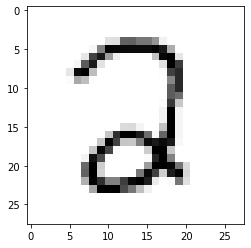

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2505124061894266
train accuracy is: 0.5928893340010015, test accuracy is 0.5957661290322581


Epoch 10 Loss 0.10968572175823887
train accuracy is: 0.9169587714905691, test accuracy is 0.9248991935483871


Epoch 20 Loss 0.06146772632286602
train accuracy is: 0.9411617426139208, test accuracy is 0.9460685483870968


Epoch 30 Loss 0.04652463372552469
train accuracy is: 0.9502587214154565, test accuracy is 0.9576612903225806


Epoch 40 Loss 0.0395351136959494
train accuracy is: 0.9563511934568519, test accuracy is 0.9611895161290323


Epoch 50 Loss 0.03548923559634326
train accuracy is: 0.9606075780337172, test accuracy is 0.9637096774193549


Epoch 60 Loss 0.03280916756146754
train accuracy is: 0.9621932899349024, test accuracy is 0.9657258064516129


Epoch 70 Loss 0.030867115116677054
train accuracy is: 0.9644466700050075, test accuracy is 0.9662298387096774


Epoch 80 Loss 0.029369472642083335
train accuracy is: 0.9662827574695376, test accuracy is 0.9672379032258065


Epoch 90 Loss 0.028162148757385645
train accuracy is: 0.9673677182440327, test accuracy is 0.9692540322580645


Epoch 100 Loss 0.0271533805992447
train accuracy is: 0.9687030545818728, test accuracy is 0.96875


Epoch 110 Loss 0.026296075782852316
train accuracy is: 0.9693707227507928, test accuracy is 0.96875


Epoch 120 Loss 0.025527484837301367
train accuracy is: 0.9701218494408279, test accuracy is 0.96875


Epoch 130 Loss 0.024861996351586837
train accuracy is: 0.9711233516942079, test accuracy is 0.96875


Epoch 140 Loss 0.024254040375440527
train accuracy is: 0.971957936905358, test accuracy is 0.9682459677419355


Epoch 150 Loss 0.023697258178720208
train accuracy is: 0.9725421465531631, test accuracy is 0.9702620967741935


Epoch 160 Loss 0.023187943330541493
train accuracy is: 0.9727925221165081, test accuracy is 0.969758064516129


Epoch 170 Loss 0.022711378394120484
train accuracy is: 0.9732932732431981, test accuracy is 0.9702620967741935


Epoch 180 Loss 0.022263702195060752
train accuracy is: 0.9738774828910032, test accuracy is 0.9707661290322581


Epoch 190 Loss 0.021836780288339092
train accuracy is: 0.9747955266232682, test accuracy is 0.9712701612903226


Epoch 200 Loss 0.021430218423714766
train accuracy is: 0.9750459021866132, test accuracy is 0.9712701612903226


Epoch 210 Loss 0.02104487792263615
train accuracy is: 0.9757970288766483, test accuracy is 0.9717741935483871


Epoch 220 Loss 0.020672006404428317
train accuracy is: 0.9758804873977633, test accuracy is 0.9717741935483871


Epoch 230 Loss 0.020323385726822886
train accuracy is: 0.9763812385244534, test accuracy is 0.9717741935483871


Epoch 240 Loss 0.01997676232822593
train accuracy is: 0.9772158237356035, test accuracy is 0.9722782258064516


0.05420960778691011

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.22073157775641636
train accuracy is: 0.7832582206643298, test accuracy is 0.8009072580645161


Epoch 10 Loss 0.09816579167559683
train accuracy is: 0.9178768152228343, test accuracy is 0.9314516129032258


Epoch 20 Loss 0.07670980315233002
train accuracy is: 0.9298113837422801, test accuracy is 0.9425403225806451


Epoch 30 Loss 0.06667708570570975
train accuracy is: 0.9382406943748957, test accuracy is 0.9495967741935484


Epoch 40 Loss 0.060542937713261254
train accuracy is: 0.9420797863461859, test accuracy is 0.9556451612903226


Epoch 50 Loss 0.05630634936583917
train accuracy is: 0.9467534635286263, test accuracy is 0.9566532258064516


Epoch 60 Loss 0.05316123753760445
train accuracy is: 0.9490903021198465, test accuracy is 0.9601814516129032


Epoch 70 Loss 0.05071051151635554
train accuracy is: 0.9500918043732265, test accuracy is 0.9596774193548387


Epoch 80 Loss 0.04873454316807155
train accuracy is: 0.9516775162744117, test accuracy is 0.9601814516129032


Epoch 90 Loss 0.04709777707205906
train accuracy is: 0.9531797696544817, test accuracy is 0.9611895161290323


Epoch 100 Loss 0.04571390149705218
train accuracy is: 0.9540978133867468, test accuracy is 0.9616935483870968


Epoch 110 Loss 0.04452453168221664
train accuracy is: 0.9550993156401268, test accuracy is 0.9637096774193549


Epoch 120 Loss 0.04348700315214165
train accuracy is: 0.9557669838090469, test accuracy is 0.9657258064516129


Epoch 130 Loss 0.04257241142044052
train accuracy is: 0.956518110499082, test accuracy is 0.9662298387096774


Epoch 140 Loss 0.04175785028228522
train accuracy is: 0.957352695710232, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.04102480890937227
train accuracy is: 0.9578534468369221, test accuracy is 0.9672379032258065


Epoch 160 Loss 0.04036282507473428
train accuracy is: 0.9587714905691871, test accuracy is 0.967741935483871


Epoch 170 Loss 0.039760065649925
train accuracy is: 0.9590218661325322, test accuracy is 0.9682459677419355


Epoch 180 Loss 0.039207056531418115
train accuracy is: 0.9593557002169921, test accuracy is 0.967741935483871


Epoch 190 Loss 0.03869823482571057
train accuracy is: 0.9600233683859122, test accuracy is 0.9682459677419355


Epoch 200 Loss 0.038228598848775365
train accuracy is: 0.9605241195126022, test accuracy is 0.967741935483871


Epoch 210 Loss 0.03779214858683819
train accuracy is: 0.9610248706392923, test accuracy is 0.967741935483871


Epoch 220 Loss 0.03738536852562522
train accuracy is: 0.9611917876815222, test accuracy is 0.967741935483871


Epoch 230 Loss 0.03700523079641101
train accuracy is: 0.9615256217659823, test accuracy is 0.967741935483871


Epoch 240 Loss 0.03664863944728635
train accuracy is: 0.9623602069771323, test accuracy is 0.9682459677419355


0.030511185064090365

### Comparing results of NN and LR

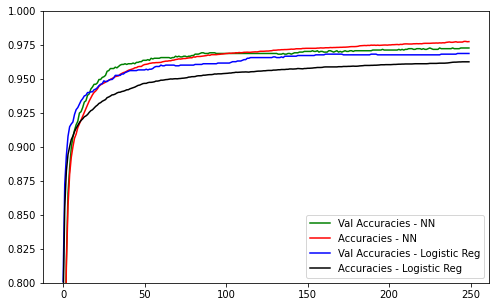

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

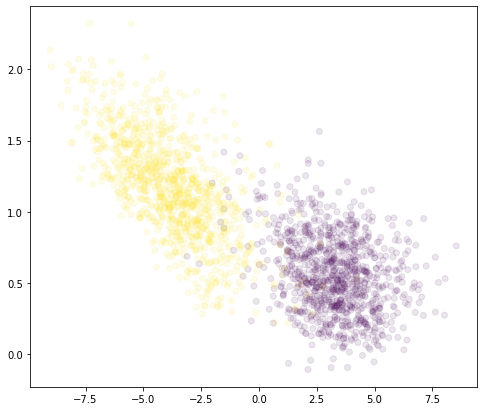

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

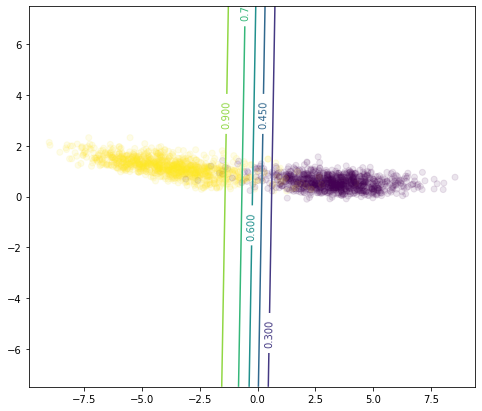

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );